In [241]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')


# Loading resutls

In [242]:
# Experiment 1
p1 = np.load('results/exp1/p_val.npy')
s1 = np.load('results/exp1/s_val.npy')
g1 = np.load('results/exp1/g_val.npy')
pe1 = np.load('results/exp1/pe_val.npy')
se1 = np.load('results/exp1/se_val.npy')
ge1 = np.load('results/exp1/ge_val.npy')
# Expreriment 2
p2 = np.load('results/exp2/p_val.npy')
s2 = np.load('results/exp2/s_val.npy')
g2 = np.load('results/exp2/g_val.npy')
pe2 = np.load('results/exp2/pe_val.npy')
se2 = np.load('results/exp2/se_val.npy')
ge2 = np.load('results/exp2/ge_val.npy')

# Plot Experiment 2

For 1 hours keep larvae in medium with constant concentration of 1pml paracetamol

In [243]:
def plots(p1, g1, s1, title, subtitles, labels, p2=[], s2=[], g2=[]):
  fig, axis = plt.subplots(1,3, figsize=(20,6))
  fig.tight_layout(pad=5.0)
  fig.suptitle(title, fontsize=18, fontweight='bold')
  # Paracetamol
  axis[0].set_title(subtitles[0], size=16)
  axis[0].plot(p1, color='blue')
  if len(p2) != 0:
    axis[0].plot(p2, '--', color='blue')
  axis[0].set_xlabel(labels[0][0],  fontsize=14)
  axis[0].set_ylabel(labels[0][1],  fontsize=14)
  axis[0].set_yscale("log", base=10)
  axis[0].set_xscale("linear")

  # Paracetamol-glucuronide
  axis[1].set_title(subtitles[1], size=16)
  axis[1].plot(g1, color='magenta')
  if len(g2) != 0:
    axis[1].plot(g2, '--', color='magenta')
  axis[1].set_xlabel(labels[1][0], fontsize=14)
  axis[1].set_ylabel(labels[1][1], fontsize=14)
  axis[1].set_yscale("log", base=10)
  axis[1].set_xscale("linear")

  # Paracetamol-sulfate
  axis[2].set_title(subtitles[2],size=16)
  axis[2].plot(s1, color='orange')
  if len(s2) != 0:
    axis[2].plot(s2, '--', color='orange')
  axis[2].set_xlabel(labels[2][0], fontsize=14)
  axis[2].set_ylabel(labels[2][1], size=14)
  axis[2].set_yscale("log", base=10)
  axis[2].set_xscale("linear")
  plt.show()

In [244]:
subtitles_exposure = [
  'Paracetamol in homogenate',
  'Paracetamol-glucuronide in homogenate',
  'Paracetamol-sulfate in homogenate'
]
labels_exposure = [
  [
    ('Time (min)'),
    ('Compound (pmoles/larva)')
  ],
  [
    ('Time (min)'),
    ('Compound (pmoles/larva)')
  ],
  [
    ('Time (min)'),
    ('Compound (pmoles/larva)')
  ]
]
title_exposure = 'Internal Exposure'

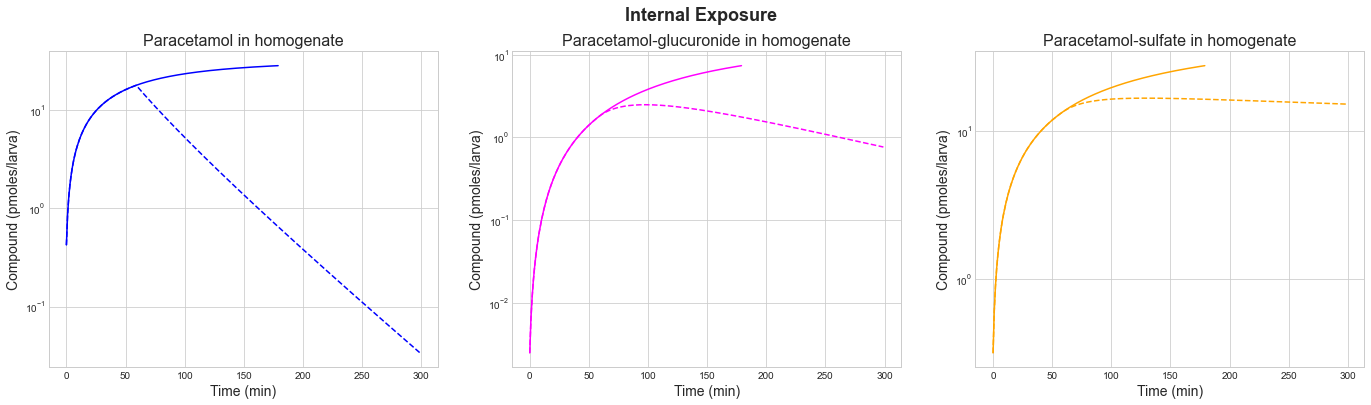

In [245]:
plots(
    p1=p1, 
    p2=p2, 
    s1=s1, 
    s2=s2, 
    g1=g1, 
    g2=g2, 
    title=title_exposure,
    subtitles=subtitles_exposure,
    labels=labels_exposure
  )

In [246]:
title_excreted = 'Excreted Compound'
subtitles_excreted = [
  'Paracetamol excreted',
  'Paracetamol-glucuronide excreted',
  'Paracetamol-sulfate excreted'
]
labels_excreted = [
  [
    ('Time (min)'),
    ('Excreted Compound (pmoles/larva)')
  ],
  [
    ('Time (min)'),
    ('Excreted Compound (pmoles/larva)')
  ],
  [
    ('Time (min)'),
    ('Excreted Compound (pmoles/larva)')
  ]
]

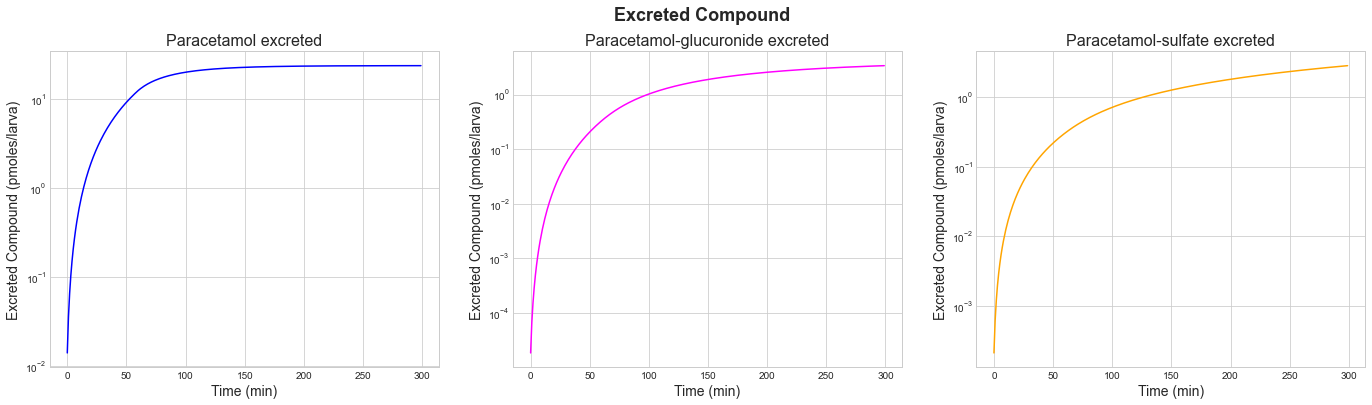

In [247]:
plots(
    p1=pe2, 
    g1=ge2, 
    s1=se2,
    title=title_excreted,
    subtitles=subtitles_excreted,
    labels=labels_excreted
  )

Text(122.625, 0.5, 'Paracetamol Clearance (μL/h)')

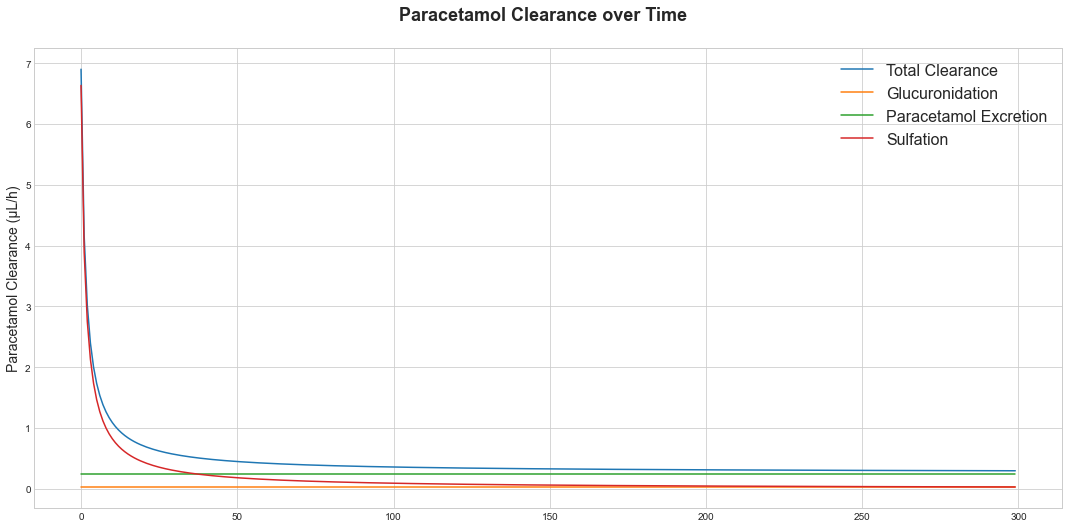

In [250]:
sulfation = []
glucu = []
excre = []
K_pe = 0.0185
K_gf = 0.00327
for t in range(300):
  k_PS_f_0 = 0.422
  t_50 = 1.42
  k_PS_f = k_PS_f_0*(1- (t/(t_50 + t)))
  sulfation.append(k_PS_f*0.262*60)
  excre.append(K_pe*0.218*60)
  glucu.append(K_gf*0.125*60)
tot = np.array(sulfation) + np.array(glucu) + np.array(excre)
fig, ax = plt.subplots(figsize=(16,8))
fig.tight_layout(pad=5.0)
ax.plot(tot, label='Total Clearance')
ax.plot(glucu, label='Glucuronidation')
ax.plot(excre, label='Paracetamol Excretion')
ax.plot(sulfation, label='Sulfation')
plt.legend(prop={'size': 16})
fig.suptitle('Paracetamol Clearance over Time', fontsize=18, fontweight='bold')
ax.set_ylabel('Paracetamol Clearance (μL/h)', fontsize=14)
ax.set_xlabel('Time (min)', fontsize=14)